# Perform Principal Component Analysis and perform clustering using first 3 principal scores

### PCA

#### Importing necessary libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

In [2]:
data = pd.read_csv("wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Exploratory Data Analysis

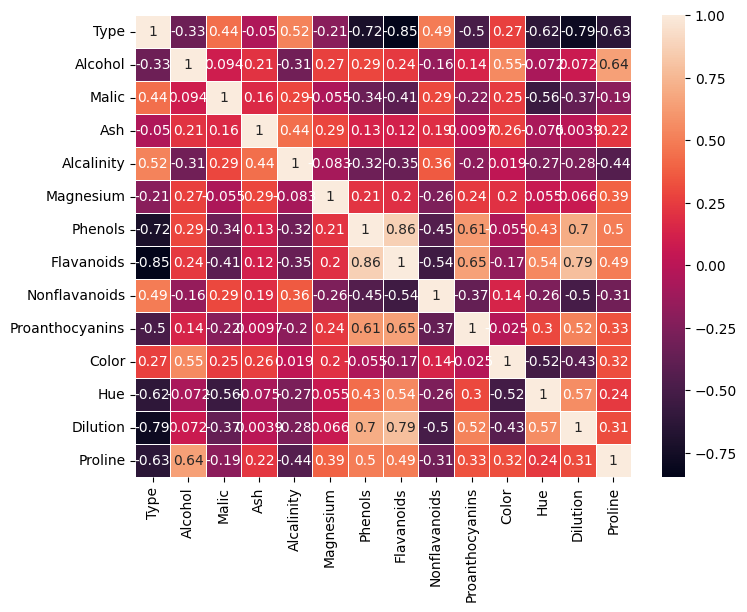

In [3]:
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, ax=ax)
plt.show()

#### Pre-processing

In [4]:
data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [6]:
Y = data['Type']
col_names=['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols','Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue','Dilution', 'Proline']
X = data[col_names]

#### Scaling

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### PCA

In [54]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [48]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [49]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Target'] = Y

In [50]:
print(pca_df.head())

        PC1       PC2       PC3  Target
0  3.316751 -1.443463 -0.165739       1
1  2.209465  0.333393 -2.026457       1
2  2.516740 -1.031151  0.982819       1
3  3.757066 -2.756372 -0.176192       1
4  1.008908 -0.869831  2.026688       1


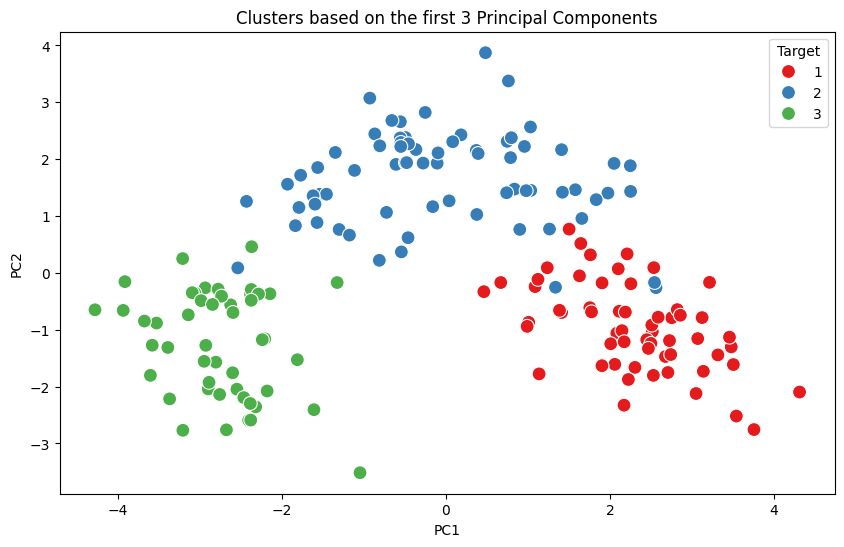

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', palette='Set1', data=pca_df, s=100)# alpha=0.9
plt.title('Clusters based on the first 3 Principal Components')
plt.show()

In [59]:
## PCA where 80% total variance must be there